In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.system('rm -r test')
os.system('rm -r train')
os.system('rm -r valid')
os.system('rm -r birds.csv')
os.system('rm -r EfficientNetB0-525-(224 X 224)- 98.97.h5')

512

In [ ]:
!mkdir -p ~/.kaggle
!echo '{"username":"emmaholte","key":"c0ba373fa8318017f865ad5d6c6cfe47"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gpiosenka/100-bird-species --force

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100% 1.95G/1.96G [01:08<00:00, 31.0MB/s]
100% 1.96G/1.96G [01:08<00:00, 30.6MB/s]


In [ ]:
! unzip "100-bird-species.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

In [ ]:
train_dir = '/content/train'
valid_dir = '/content/valid'
test_dir = '/content/test'

In [ ]:
#train_dir = '/content/birds_dataset/train'
#test_dir = '/content/birds_dataset/test'
#valid_dir = '/content/birds_dataset/valid'

# counts files
def count_images(directory):
    count = 0
    for _, _, files in os.walk(directory):
        count += len(files)
    return count

train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)
train_split = train_count / (train_count+test_count+valid_count)
valid_split = valid_count / (train_count+test_count+valid_count)
test_split = test_count / (train_count+test_count+valid_count)


print(f"Number of images in Train: {train_count} with split: {train_split}")
print(f"Number of images in Valid: {valid_count} with split: {valid_split}")
print(f"Number of images in Test: {test_count} with split: {test_split}")

Number of images in Train: 84635 with split: 0.9415920342660066
Number of images in Valid: 2625 with split: 0.029203982866996717
Number of images in Test: 2625 with split: 0.029203982866996717


In [ ]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)

Total directories in /content/train: 525
Total directories in /content/test: 525
Total directories in /content/valid: 525
Species missing from train: {'PARAKETT AUKLET'}
Species missing from test: {'PARAKETT AUKLET'}
Species missing from valid: {'PARAKETT  AUKLET'}


In [ ]:
import os

#train_dir = '/content/birds_dataset/train'
#test_dir = '/content/birds_dataset/test'
train_dir = '/content/train'
test_dir = '/content/test'

# Define the incorrect and correct paths for train and test
incorrect_path_train = os.path.join(train_dir, 'PARAKETT  AUKLET')
correct_path_train = os.path.join(train_dir, 'PARAKETT AUKLET')

incorrect_path_test = os.path.join(test_dir, 'PARAKETT  AUKLET')
correct_path_test = os.path.join(test_dir, 'PARAKETT AUKLET')

# Rename the directories in train and test
try:
    os.rename(incorrect_path_train, correct_path_train)
    print(f"Renamed in train from '{incorrect_path_train}' to '{correct_path_train}'")
except FileNotFoundError as e:
    print(f"Error in train rename: {e}")

try:
    os.rename(incorrect_path_test, correct_path_test)
    print(f"Renamed in test from '{incorrect_path_test}' to '{correct_path_test}'")
except FileNotFoundError as e:
    print(f"Error in test rename: {e}")


Renamed in train from '/content/train/PARAKETT  AUKLET' to '/content/train/PARAKETT AUKLET'
Renamed in test from '/content/test/PARAKETT  AUKLET' to '/content/test/PARAKETT AUKLET'


In [ ]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)


Total directories in /content/train: 525
Total directories in /content/test: 525
Total directories in /content/valid: 525
Species missing from train: set()
Species missing from test: set()
Species missing from valid: set()


In [ ]:
import os
import shutil

def adjust_dataset_split(train_dir, test_dir, valid_dir, num_test_files, num_valid_files):
    # iterates through each species directory in the train directory
    for species in os.listdir(train_dir):
        species_train_dir = os.path.join(train_dir, species)
        species_test_dir = os.path.join(test_dir, species)
        species_valid_dir = os.path.join(valid_dir, species)

        # train directory files for each species
        files = os.listdir(species_train_dir)

        # ensures test and valid directories exist
        os.makedirs(species_test_dir, exist_ok=True)
        os.makedirs(species_valid_dir, exist_ok=True)

        # move files to test
        for file in files[:num_test_files]:
            shutil.move(os.path.join(species_train_dir, file), os.path.join(species_test_dir, file))

        # update list of files remaining in train
        remaining_files = os.listdir(species_train_dir)

        # move files to valid
        for file in remaining_files[:num_valid_files]:
            shutil.move(os.path.join(species_train_dir, file), os.path.join(species_valid_dir, file))


# specify number of files to move to respective dirs
num_test_files = 10
num_valid_files = 10


adjust_dataset_split(train_dir, test_dir, valid_dir, num_test_files, num_valid_files)
print("Files have been moved to achieve the specified dataset split.")


Files have been moved to achieve the specified dataset split.


In [ ]:
train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)
train_split = train_count / (train_count+test_count+valid_count)
valid_split = valid_count / (train_count+test_count+valid_count)
test_split = test_count / (train_count+test_count+valid_count)


print(f"Number of images in Train: {train_count} with proportion: {train_split}")
print(f"Number of images in Valid: {valid_count} with proportion: {valid_split}")
print(f"Number of images in Test: {test_count} with proportion: {test_split}")

Number of images in Train: 74135 with proportion: 0.8247761027980197
Number of images in Valid: 7875 with proportion: 0.08761194860099016
Number of images in Test: 7875 with proportion: 0.08761194860099016


In [ ]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)


Total directories in /content/train: 525
Total directories in /content/test: 525
Total directories in /content/valid: 525
Species missing from train: set()
Species missing from test: set()
Species missing from valid: set()


In [ ]:
batch_size = 32
img_size = 224

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 74135 images belonging to 525 classes.
Found 7875 images belonging to 525 classes.
Found 7875 images belonging to 525 classes.


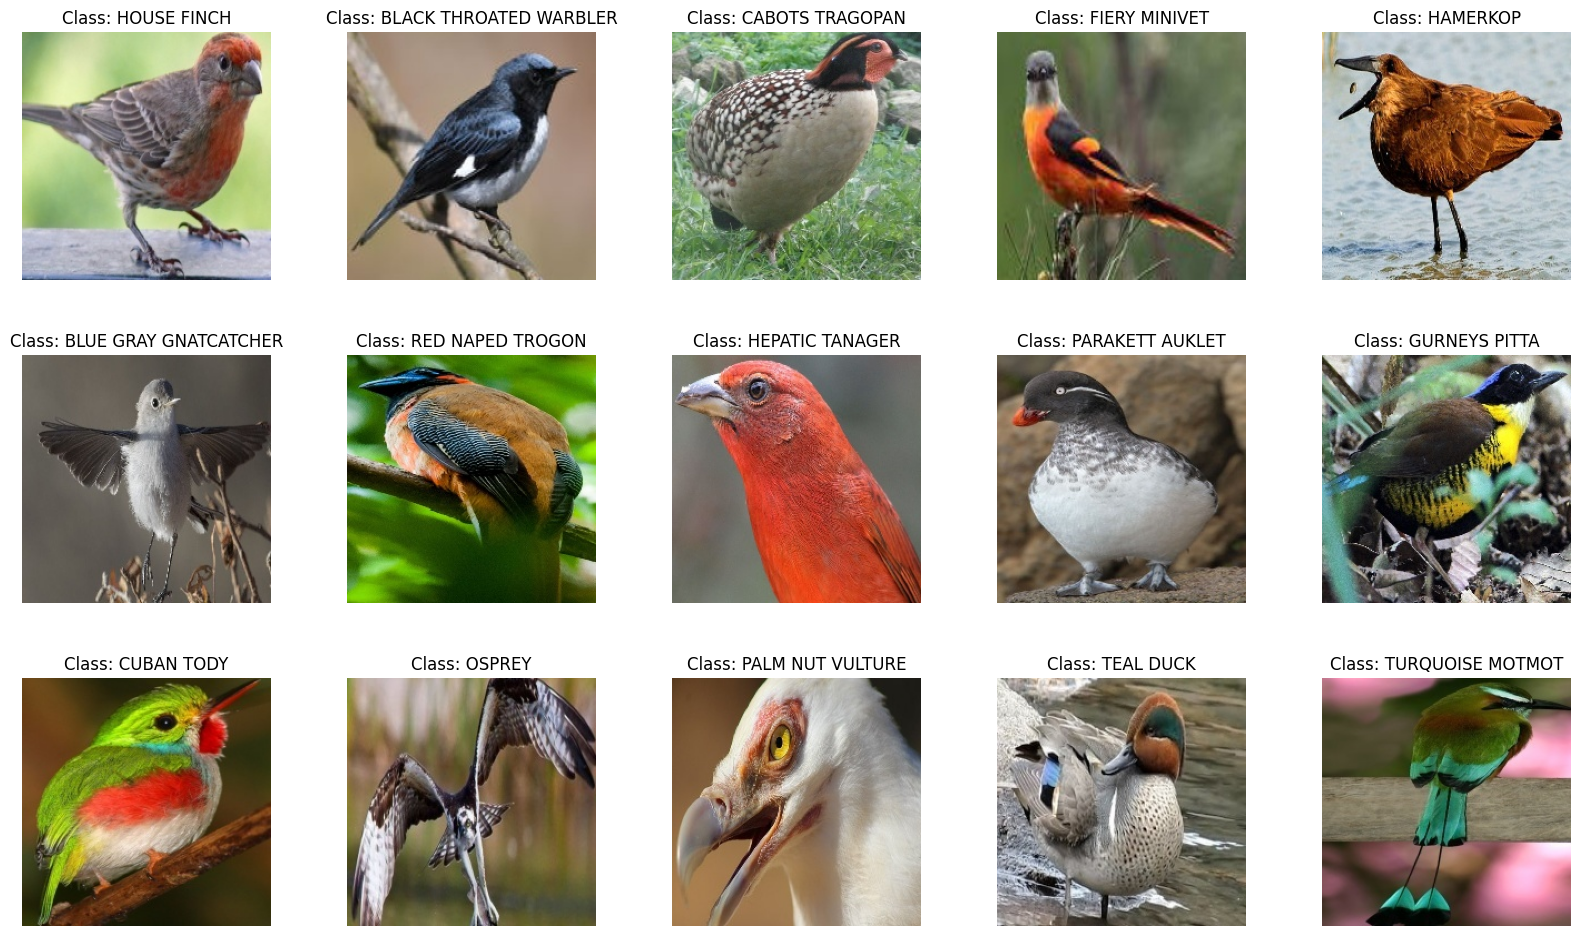

In [ ]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(include_top = False,
                       weights = 'imagenet',
                       input_shape = (img_size,img_size,3))

In [ ]:
num_layers = len(base_model.layers)
num_layers

154

In [ ]:
# Transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Fine-tuning (half of layers)
#for layer in base_model.layers[:num_layers//2]:
    #layer.trainable = False

# Full Fine-tuning
#for layer in base_model.layers:
    #layer.trainable = True

In [ ]:
#from tensorflow import load_model

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(525, activation='softmax'))

#savedModel=load_model('birds_mobile_model')

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


"\nmodel.compile(optimizer=Adam(learning_rate=0.0001),\n            loss='categorical_crossentropy',\n            metrics=['accuracy'])\n            "

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                   )

In [ ]:
model.save_weights('./mobilebirds_weights_all_frozen.h5')

In [ ]:
import os
os.getcwd()

In [ ]:
plt.plot(history.history['accuracy'], c = 'darkcyan')
plt.plot(history.history['val_accuracy'], c = 'crimson')
plt.title('Model accuracy - transfer learning', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(['Train', 'Val'], loc='upper left', fontsize = 12)
plt.savefig('Modelaccuracy_transfer_learning.png', dpi = 300)
plt.show()

In [ ]:
plt.plot(history.history['loss'], c = 'darkcyan')
plt.plot(history.history['val_loss'], c = 'crimson')
plt.title('Model loss - transfer learning', fontsize = 18)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(['Train', 'Val'], loc='upper right', fontsize = 12)
plt.savefig('Modelloss_transfer_learning.png', dpi = 300)
plt.show()

In [ ]:
predictions = model.predict(test_generator)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

In [ ]:
# Get the true labels from the generator
true_labels = test_generator.classes

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming predictions and true_labels are already obtained

# Generate the classification report as a dictionary
report_dict = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Sort the DataFrame by F1 score in descending order
sorted_report_df = report_df.sort_values(by='f1-score', ascending=True)

# Print the sorted report
print(sorted_report_df.iloc[0:20])
sorted_report_df.to_csv('Birds_report_transfer_learning.csv')

In [ ]:
# Calculate the overall F1 score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
overall_f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'Overall F1 Score: {overall_f1}')

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_generator.classes, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sorted_report_df['f1-score'].plot(c = 'cadetblue')
plt.title('f1-score for bird classes - transfer learning', fontsize = 18)
plt.xlabel('Bird classes', fontsize = 12)
plt.ylabel('f1-score', fontsize = 12)
plt.xticks(fontsize = 12, rotation = 20)
plt.yticks(fontsize = 12)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.savefig('f1_transfer_learning.png', dpi = 300)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming you have obtained true_labels and predicted_labels already

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Convert the confusion matrix to a DataFrame for easier manipulation
conf_matrix_df = pd.DataFrame(conf_matrix, index=test_generator.class_indices.keys(), columns=test_generator.class_indices.keys())

# Analyze misclassifications
for class_name in test_generator.class_indices.keys():
    misclassified_count = np.sum(predicted_labels[true_labels == test_generator.class_indices[class_name]] != test_generator.class_indices[class_name])
    if misclassified_count > 0:
        print(f"Class '{class_name}' is misclassified {misclassified_count} times:")
        # Find misclassified samples
        misclassified_samples = np.where((true_labels == test_generator.class_indices[class_name]) & (predicted_labels != test_generator.class_indices[class_name]))[0]
        # Print misclassified labels
        misclassified_labels = [list(test_generator.class_indices.keys())[predicted_labels[idx]] for idx in misclassified_samples]
        print(f"Misclassified labels: {misclassified_labels}")
        print("-------------------------------------")